In [1]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
MHz, kHz, us, ns = 2 * jnp.pi, 2 * jnp.pi * 1e-3, 1, 1e-3

In [3]:
N = 100
nbars = jnp.linspace(0, 40, 11)[1:]
t_max = 100 * ns
delta = 0 * kHz
kerr_4 = -15 * kHz
kerr_6 = 0.0 * kHz

a = dq.destroy(N)
ad = dq.dag(a)
H = (
    delta * ad @ a
    - kerr_4 / 2 * ad @ ad @ a @ a
    - kerr_6 / 6 * ad @ ad @ ad @ a @ a @ a
)

times = jnp.linspace(0, t_max, 31)
psis = dq.coherent(N, jnp.sqrt(nbars) * jnp.exp(1j * jnp.pi / 4))
outputs = dq.sesolve(H, psis, times, exp_ops=[a, a @ a])

2024-08-23 15:04:54.943177: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
|██████████| 100.0% ◆ total 0.06s ◆ remaining 00:00


Text(0.5, 0.98, '$\\Delta = 0.00 kHz, \\chi_4 = -15.00 kHz, \\chi_6 = -0.00 kHz$')

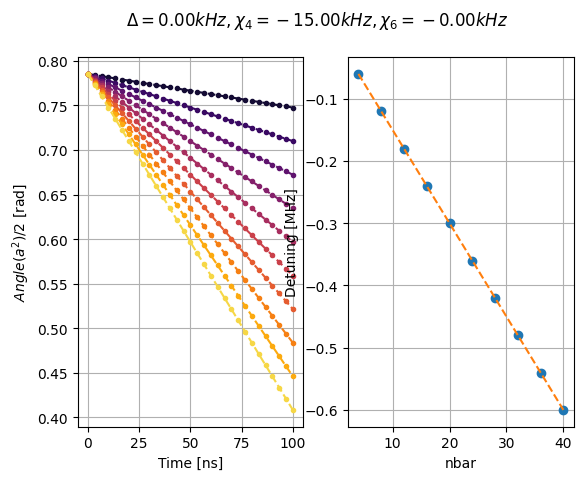

In [4]:
# Analysis for observalble a

fig, ax = plt.subplots(1, 2)
phases = jnp.unwrap(jnp.angle(outputs.expects[:, 0]))
colors = plt.get_cmap("inferno")(nbars / nbars[-1] * 0.9)
fits = jnp.zeros((len(nbars), 2))
for ind in range(len(nbars)):
    ax[0].plot(times / ns, phases[ind], ".", color=colors[ind])
    fits = fits.at[ind].set(jnp.polyfit(times, phases[ind], 1))
    ax[0].plot(
        times / ns, jnp.polyval(fits[ind], times), color=colors[ind], linestyle="--"
    )
ax[0].grid(True)
ax[0].set_xlabel("Time [ns]")
ax[0].set_ylabel("$Angle(a^2)/2$ [rad]")

ax[1].plot(nbars, fits[:, 0] / MHz, "o")
ax[1].set_xlabel("nbar")
ax[1].set_ylabel("Detuning [MHz]")
ax[1].grid(True)
detuning_fit = jnp.polyfit(nbars, fits[:, 0], 2)
ax[1].plot(nbars, jnp.polyval(detuning_fit, nbars) / MHz, linestyle="--")

fig.suptitle(
    f"$\Delta = {-detuning_fit[2]/kHz:.2f} kHz, \chi_4 = {detuning_fit[1]/kHz:.2f} kHz, \chi_6 = {2*detuning_fit[0]/kHz:.2f} kHz$"
)

Text(0.5, 0.98, '$\\Delta = 7.50 kHz, \\chi_4 = -15.00 kHz, \\chi_6 = -0.00 kHz$')

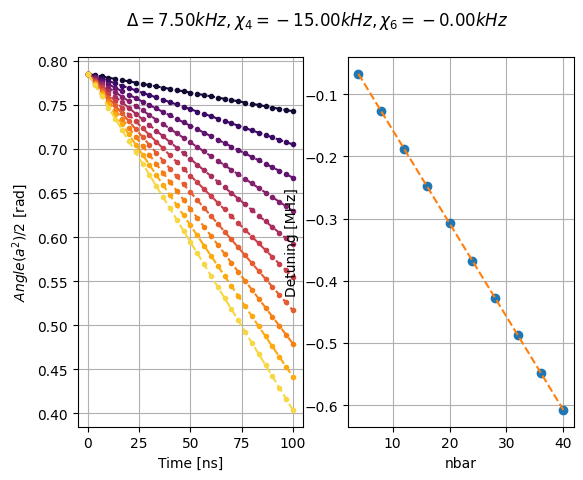

In [5]:
# Analysis for observalble a^2/2

fig, ax = plt.subplots(1, 2)
phases = jnp.unwrap(jnp.angle(outputs.expects[:, 1])) / 2
colors = plt.get_cmap("inferno")(nbars / nbars[-1] * 0.9)
fits = jnp.zeros((len(nbars), 2))
for ind in range(len(nbars)):
    ax[0].plot(times / ns, phases[ind], ".", color=colors[ind])
    fits = fits.at[ind].set(jnp.polyfit(times, phases[ind], 1))
    ax[0].plot(
        times / ns, jnp.polyval(fits[ind], times), color=colors[ind], linestyle="--"
    )
ax[0].grid(True)
ax[0].set_xlabel("Time [ns]")
ax[0].set_ylabel("$Angle(a^2)/2$ [rad]")

ax[1].plot(nbars, fits[:, 0] / MHz, "o")
ax[1].set_xlabel("nbar")
ax[1].set_ylabel("Detuning [MHz]")
ax[1].grid(True)
detuning_fit = jnp.polyfit(nbars, fits[:, 0], 2)
ax[1].plot(nbars, jnp.polyval(detuning_fit, nbars) / MHz, linestyle="--")

fig.suptitle(
    f"$\Delta = {-detuning_fit[2]/kHz:.2f} kHz, \chi_4 = {detuning_fit[1]/kHz:.2f} kHz, \chi_6 = {2*detuning_fit[0]/kHz:.2f} kHz$"
)

Text(0.5, 0.98, '$\\Delta = 0.00 kHz, \\chi_4 = -15.00 kHz, \\chi_6 = -0.00 kHz$')

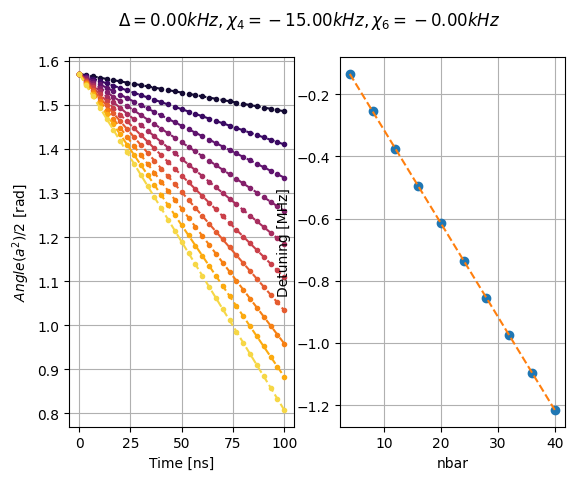

In [6]:
# Analysis for observalble a^2

fig, ax = plt.subplots(1, 2)
phases = jnp.unwrap(jnp.angle(outputs.expects[:, 1]))
colors = plt.get_cmap("inferno")(nbars / nbars[-1] * 0.9)
fits = jnp.zeros((len(nbars), 2))
for ind in range(len(nbars)):
    ax[0].plot(times / ns, phases[ind], ".", color=colors[ind])
    fits = fits.at[ind].set(jnp.polyfit(times, phases[ind], 1))
    ax[0].plot(
        times / ns, jnp.polyval(fits[ind], times), color=colors[ind], linestyle="--"
    )
ax[0].grid(True)
ax[0].set_xlabel("Time [ns]")
ax[0].set_ylabel("$Angle(a^2)/2$ [rad]")

ax[1].plot(nbars, fits[:, 0] / MHz, "o")
ax[1].set_xlabel("nbar")
ax[1].set_ylabel("Detuning [MHz]")
ax[1].grid(True)
detuning_fit = jnp.polyfit(nbars, fits[:, 0], 2)
ax[1].plot(nbars, jnp.polyval(detuning_fit, nbars) / MHz, linestyle="--")
kerr_4_fit = detuning_fit[1] / 2
delta_fit = -(detuning_fit[2] - kerr_4_fit) / 2
kerr_6_fit = detuning_fit[0]
fig.suptitle(
    f"$\Delta = {delta_fit/kHz:.2f} kHz, \chi_4 = {kerr_4_fit/kHz:.2f} kHz, \chi_6 = {kerr_6_fit/kHz:.2f} kHz$"
)

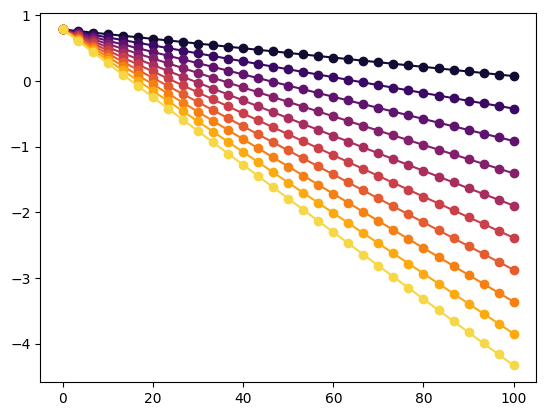

In [16]:
fig, ax = plt.subplots()
phases = jnp.unwrap(jnp.angle(outputs.expects[:, 0]))
phases = jnp.unwrap(jnp.angle(outputs.expects[:, 1])) / 2
colors = plt.get_cmap("inferno")(nbars / nbars[-1] * 0.9)
fits = jnp.zeros((len(nbars), 2))
for ind in range(len(nbars)):
    ax.plot(times / ns, phases[ind], "o", color=colors[ind])
    ax.plot(times / ns, phases[ind], "-", color=colors[ind])
plt.show()